In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset in chunks
file_path = 'C:/Users/dell/Documents/Guvi Lectures/Power Pulse/Power_Consumption_Data.csv'
chunk_size = 100000  # Number of rows per chunk


# Initialize an empty list to store processed chunks
chunks = []


for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Drop rows with missing values
    chunk = chunk.dropna()

    # Convert 'Date' to datetime and 'Time' to seconds of the day
    chunk['Date'] = pd.to_datetime(chunk['Date'], format='%d-%m-%Y', errors='coerce')
    chunk['Time'] = pd.to_datetime(chunk['Time'], format='%H:%M:%S', errors='coerce').dt.time

    # Create 'Datetime' column
    chunk['Datetime'] = pd.to_datetime(chunk['Date'].astype(str) + ' ' + chunk['Time'].astype(str))

    # Convert numerical columns to float
    numerical_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                         'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')

    # Add time-based features
    chunk['Year'] = chunk['Datetime'].dt.year
    chunk['DayOfWeek'] = chunk['Datetime'].dt.dayofweek
    chunk['Hour'] = chunk['Datetime'].dt.hour

    # Append processed chunk to the list
    chunks.append(chunk)


# Concatenate all processed chunks into a single DataFrame
df = pd.concat(chunks)


# Save the cleaned data
cleaned_file_path = 'C:/Users/dell/Documents/Guvi Lectures/Power Pulse/cleaned_power_consumption.csv'
df.to_csv(cleaned_file_path, index=False)


# Display basic statistics
print('Basic Statistics:\n', df.describe())
print('\n✅ Data Preprocessing and Feature Engineering Completed Successfully!')

C:\Users\dell\AppData\Local\Temp\ipykernel_21176\3869184831.py:16: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
C:\Users\dell\AppData\Local\Temp\ipykernel_21176\3869184831.py:16: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):


Basic Statistics:
                                 Date  Global_active_power  \
count                        1044506         1.044506e+06   
mean   2007-12-16 03:01:45.445445120         1.108202e+00   
min              2006-12-16 00:00:00         7.600000e-02   
25%              2007-06-18 00:00:00         2.880000e-01   
50%              2007-12-17 00:00:00         5.500000e-01   
75%              2008-06-15 00:00:00         1.544000e+00   
max              2008-12-13 00:00:00         1.067000e+01   
std                              NaN         1.129546e+00   

       Global_reactive_power       Voltage  Global_intensity  Sub_metering_1  \
count           1.044506e+06  1.044506e+06      1.044506e+06    1.044506e+06   
mean            1.182732e-01  2.399598e+02      4.718123e+00    1.177451e+00   
min             0.000000e+00  2.234900e+02      2.000000e-01    0.000000e+00   
25%             0.000000e+00  2.379700e+02      1.200000e+00    0.000000e+00   
50%             9.800000e-02  2

In [3]:
chunk

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,DayOfWeek,Hour
1000000,2008-11-10,04:04:00,0.274,0.000,241.68,1.2,0,0,0.0,2008-11-10 04:04:00,2008,0,4
1000001,2008-11-10,04:05:00,0.272,0.000,241.76,1.2,0,0,0.0,2008-11-10 04:05:00,2008,0,4
1000002,2008-11-10,04:06:00,0.274,0.000,241.91,1.2,0,0,0.0,2008-11-10 04:06:00,2008,0,4
1000003,2008-11-10,04:07:00,0.274,0.000,242.18,1.2,0,0,0.0,2008-11-10 04:07:00,2008,0,4
1000004,2008-11-10,04:08:00,0.274,0.000,242.73,1.2,0,0,0.0,2008-11-10 04:08:00,2008,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2008-12-13,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0,2008-12-13 21:34:00,2008,5,21
1048571,2008-12-13,21:35:00,0.424,0.076,242.10,1.8,0,0,0.0,2008-12-13 21:35:00,2008,5,21
1048572,2008-12-13,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0,2008-12-13 21:36:00,2008,5,21
1048573,2008-12-13,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0,2008-12-13 21:37:00,2008,5,21


In [4]:
chunk.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Year                     0
DayOfWeek                0
Hour                     0
dtype: int64

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the cleaned dataset
file_path = 'C:/Users/dell/Documents/Guvi Lectures\Power Pulsecleaned_power_consumption.csv'
df = pd.read_csv(file_path)


# Check basic statistics
print('--- Basic Statistics ---')
print(df.describe())


# Correlation Analysis
print('--- Correlation Analysis ---')
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Outlier Detection using Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Global_active_power', 'Global_reactive_power', 'Voltage', 
                    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
plt.title('Outlier Detection - Boxplots')
plt.show()


# Checking Skewness
print('--- Skewness of Numerical Columns ---')
skewness = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 
               'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].skew()
print(skewness)


# Plotting Distributions to visualize skewness
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution of Numerical Features')

for i, col in enumerate(['Global_active_power', 'Global_reactive_power', 'Voltage',
                         'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


print('✅ EDA Completed Successfully!')


--- Basic Statistics ---
       Global_active_power  Global_reactive_power       Voltage  \
count         1.044506e+06           1.044506e+06  1.044506e+06   
mean          1.108202e+00           1.182732e-01  2.399598e+02   
std           1.129546e+00           1.095062e-01  3.284504e+00   
min           7.600000e-02           0.000000e+00  2.234900e+02   
25%           2.880000e-01           0.000000e+00  2.379700e+02   
50%           5.500000e-01           9.800000e-02  2.402100e+02   
75%           1.544000e+00           1.860000e-01  2.421400e+02   
max           1.067000e+01           1.390000e+00  2.521400e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      1.044506e+06    1.044506e+06    1.044506e+06    1.044506e+06   
mean       4.718123e+00    1.177451e+00    1.475177e+00    5.933837e+00   
std        4.763588e+00    6.321183e+00    6.352703e+00    8.210398e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00

ValueError: could not convert string to float: '2006-12-16'

--- Basic Statistics ---
       Global_active_power  Global_reactive_power       Voltage  \
count         1.044506e+06           1.044506e+06  1.044506e+06   
mean          1.108202e+00           1.182732e-01  2.399598e+02   
std           1.129546e+00           1.095062e-01  3.284504e+00   
min           7.600000e-02           0.000000e+00  2.234900e+02   
25%           2.880000e-01           0.000000e+00  2.379700e+02   
50%           5.500000e-01           9.800000e-02  2.402100e+02   
75%           1.544000e+00           1.860000e-01  2.421400e+02   
max           1.067000e+01           1.390000e+00  2.521400e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      1.044506e+06    1.044506e+06    1.044506e+06    1.044506e+06  
mean       4.718123e+00    1.177451e+00    1.475177e+00    5.933837e+00  
std        4.763588e+00    6.321183e+00    6.352703e+00    8.210398e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
2

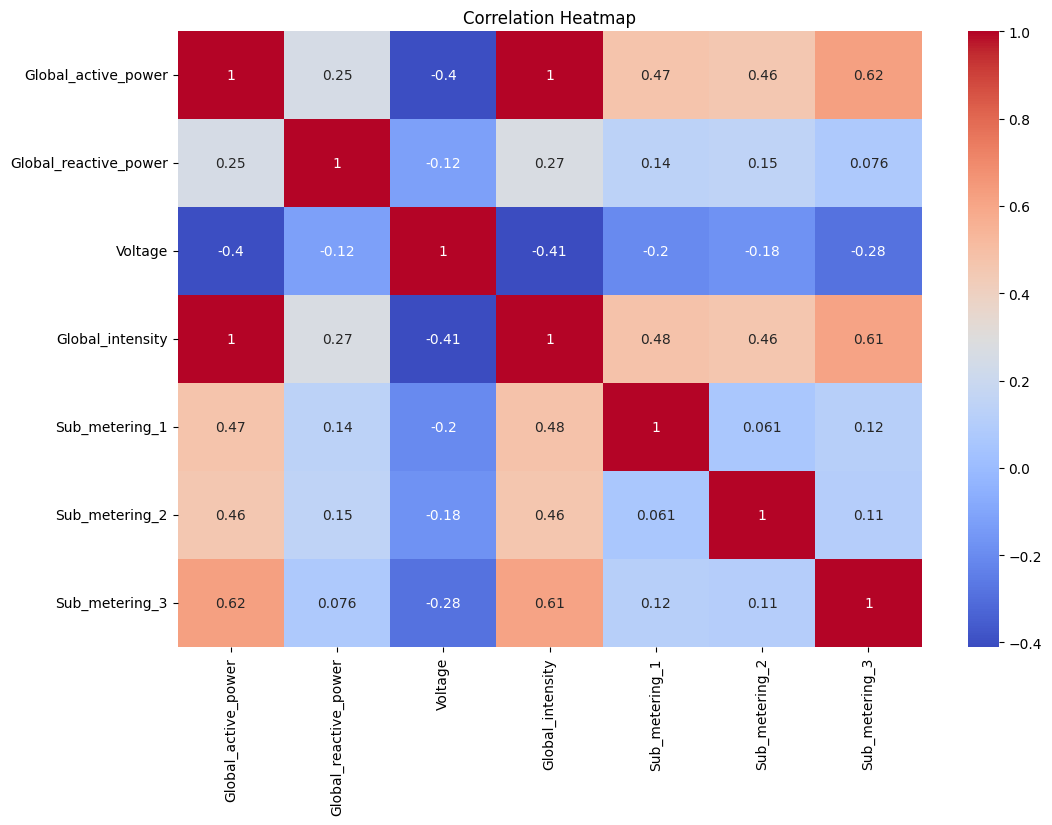

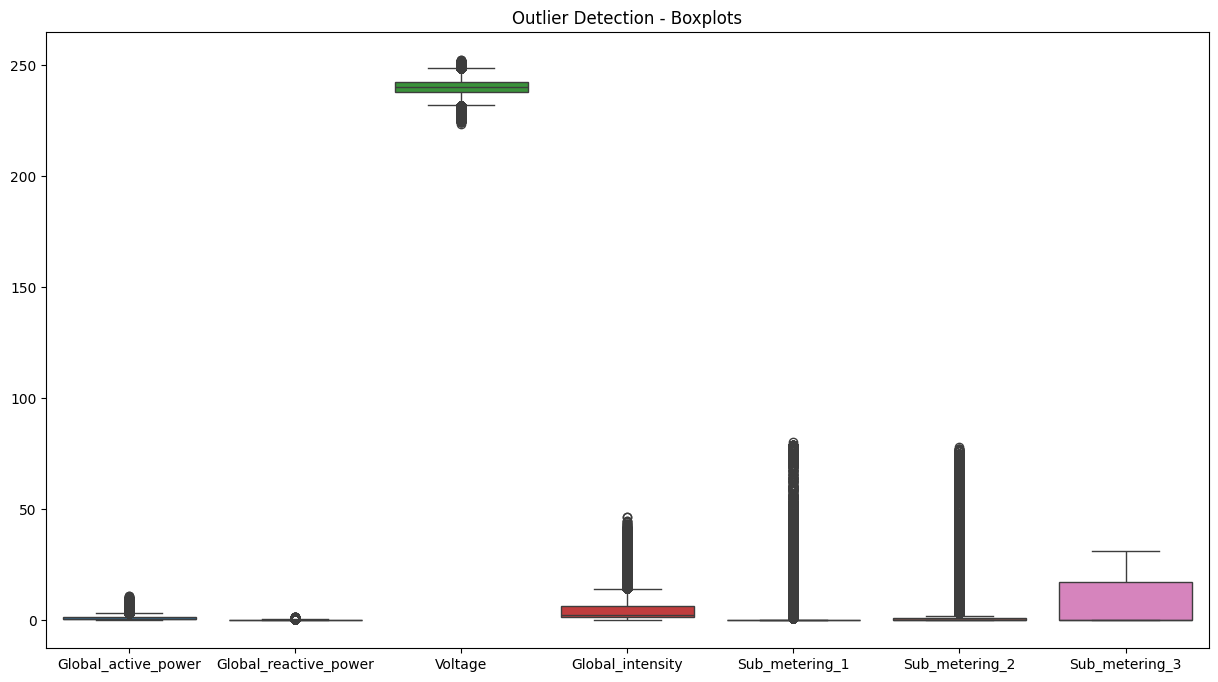

--- Skewness of Numerical Columns ---
Global_active_power      1.771386
Global_reactive_power    1.247361
Voltage                 -0.352153
Global_intensity         1.828080
Sub_metering_1           5.734676
Sub_metering_2           6.309726
Sub_metering_3           0.766779
dtype: float64


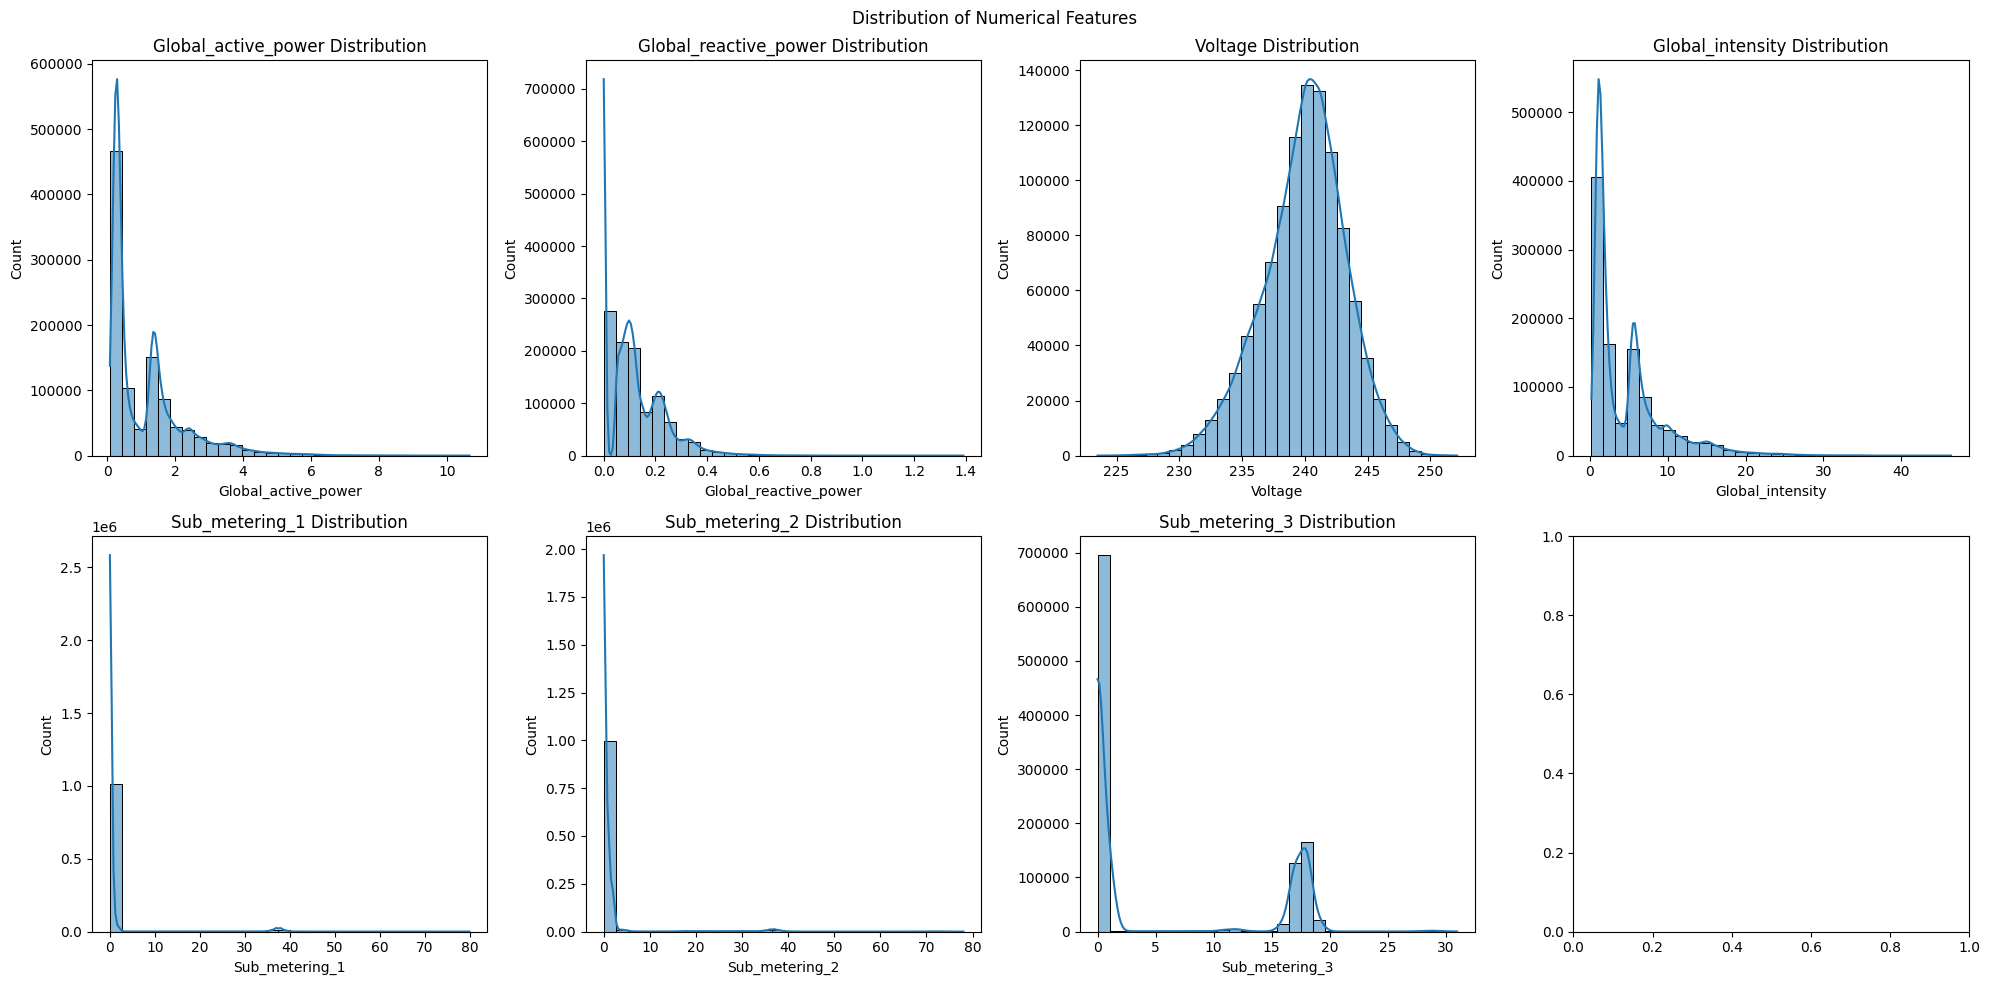

✅ EDA Completed Successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the cleaned dataset
file_path = 'C:/Users/dell/Documents/Guvi Lectures/Power Pulse/cleaned_power_consumption.csv'
df = pd.read_csv(file_path)


# Ensure numerical columns are correctly typed
numerical_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')


# Basic Statistics
basic_statistics = df[numerical_columns].describe()
print('--- Basic Statistics ---')
print(basic_statistics)


# Correlation Analysis
print('--- Correlation Analysis ---')
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Outlier Detection using Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Outlier Detection - Boxplots')
plt.show()


# Checking Skewness
print('--- Skewness of Numerical Columns ---')
skewness = df[numerical_columns].skew()
print(skewness)


# Plotting Distributions to visualize skewness
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution of Numerical Features')

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


print('✅ EDA Completed Successfully!')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Load the cleaned dataset
file_path = 'C:/Users/dell/Documents/Guvi Lectures/Power Pulse/cleaned_power_consumption.csv'
df = pd.read_csv(file_path, parse_dates=['Datetime'])

# Drop 'Global_intensity' column
if 'Global_intensity' in df.columns:
    df.drop('Global_intensity', axis=1, inplace=True)

# Checking skewness of numerical columns
skewness = df.skew()

# Identifying highly skewed columns
highly_skewed = skewness[abs(skewness) > 1].index.tolist()

# Applying log transformation to reduce skewness
for column in highly_skewed:
    if all(df[column] > 0):  # Apply log only if all values are positive
        df[column] = np.log1p(df[column])

# Plotting boxplots to check for outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[1:], 1):  # Exclude 'Date_Time'
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Save the modified dataframe
output_path = 'C:/Users/dell/Documents/Guvi Lectures/Power Pulse/processed_power_consumption.csv'
df.to_csv(output_path, index=False)

print(f"✅ Data Preprocessing Completed! File saved at: {output_path}")

TypeError: could not convert string to float: '2006-12-16'

In [6]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,DayOfWeek,Hour
0,2006-12-16,17:24:00,4.216,0.418,234.84,0,1,17.0,2006-12-16 17:24:00,2006,5,17
1,2006-12-16,17:25:00,5.360,0.436,233.63,0,1,16.0,2006-12-16 17:25:00,2006,5,17
2,2006-12-16,17:26:00,5.374,0.498,233.29,0,2,17.0,2006-12-16 17:26:00,2006,5,17
3,2006-12-16,17:27:00,5.388,0.502,233.74,0,1,17.0,2006-12-16 17:27:00,2006,5,17
4,2006-12-16,17:28:00,3.666,0.528,235.68,0,1,17.0,2006-12-16 17:28:00,2006,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1044501,2008-12-13,21:34:00,0.426,0.076,242.27,0,0,0.0,2008-12-13 21:34:00,2008,5,21
1044502,2008-12-13,21:35:00,0.424,0.076,242.10,0,0,0.0,2008-12-13 21:35:00,2008,5,21
1044503,2008-12-13,21:36:00,0.422,0.076,241.73,0,0,0.0,2008-12-13 21:36:00,2008,5,21
1044504,2008-12-13,21:37:00,0.422,0.078,242.56,0,0,0.0,2008-12-13 21:37:00,2008,5,21


In [7]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Sub_metering_1                    int64
Sub_metering_2                    int64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
Year                              int64
DayOfWeek                         int64
Hour                              int64
dtype: object

In [8]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
file_path = 'C:/Users/dell/Documents/Guvi Lectures/Power Pulse/cleaned_power_consumption.csv'
df = pd.read_csv(file_path, parse_dates=['Datetime'])

# Drop irrelevant columns
columns_to_drop = ['Date', 'Time']
df.drop(columns=columns_to_drop, inplace=True)


# ------------------ Step 1: Outlier Removal ------------------

# Define function to remove outliers

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of numerical columns to check for outliers
num_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
               'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df = remove_outliers(df, num_columns)


# ------------------ Step 2: Handling Skewness ------------------

def handle_skewness(df, columns):
    for column in columns:
        if df[column].skew() > 1 or df[column].skew() < -1:  # Checking high skewness
            df[column] = np.log1p(df[column])  # Log Transformation
    return df

# Applying skewness handling
skewed_columns = num_columns

df = handle_skewness(df, skewed_columns)


# ------------------ Step 3: Correlation Analysis ------------------

# Dropping highly correlated columns
correlated_columns = ['Global_intensity']
df.drop(columns=correlated_columns, inplace=True)


# Saving the cleaned data
cleaned_file_path = 'C:/Users/dell/Documents/Guvi Lectures/Power Pulse/final_cleaned_power_consumption.csv'
df.to_csv(cleaned_file_path, index=False)

print(f'✅ Preprocessing completed and saved to {cleaned_file_path}')

✅ Preprocessing completed and saved to C:/Users/dell/Documents/Guvi Lectures/Power Pulse/final_cleaned_power_consumption.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the cleaned data
file_path = 'C:/Users/dell/Documents/Guvi Lectures/Power Pulse/final_cleaned_power_consumption.csv'
df = pd.read_csv(file_path)

# Define input features (X) and target variable (y)
X = df.drop(['Global_active_power', 'Datetime'], axis=1)
y = df['Global_active_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }

# Display results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")

# Next Steps: Hyperparameter Tuning


Model: Linear Regression
MAE: 0.15921627981326356
MSE: 0.05198359723010232
RMSE: 0.22799911673096965
R2 Score: 0.5898173312014298

Model: Random Forest
MAE: 0.09380671847276985
MSE: 0.027465231502966325
RMSE: 0.16572637539922946
R2 Score: 0.7832823706449158

Model: Gradient Boosting
MAE: 0.12984968966217994
MSE: 0.03804528832121056
RMSE: 0.19505201439926367
R2 Score: 0.6997991918541473

Model: Neural Network
MAE: 0.16156711043694535
MSE: 0.049950140603386574
RMSE: 0.22349528094209634
R2 Score: 0.605862559128623
